In [1]:
import tensorflow as tf

C:\Users\judyj\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.__version__

'1.7.0'

In [3]:
#backend 後端
import keras

Using TensorFlow backend.


In [4]:
keras.__version__

'2.1.5'

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
#utils:常用函式庫，用於將1D標籤轉為one-hot的2D標籤
from keras.datasets import mnist #keras的data set
from keras.models import Sequential #keras的 model 
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils 

In [6]:
nb_classes = 10
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)


x_train original shape (60000, 28, 28)
y_train original shape (60000,)


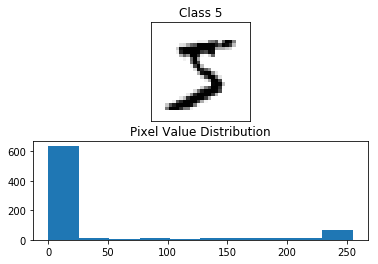

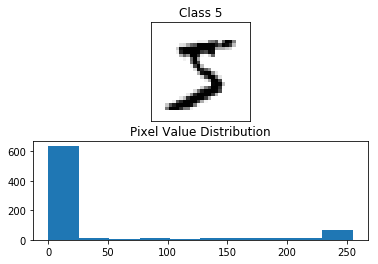

In [7]:
#顯示train data第一類[0]的圖
fig = plt.figure()
plt.subplot(2,1,1)#共要畫兩張圖 為2*1維度 目前要畫的是第一張
plt.imshow(x_train[0], cmap='binary', interpolation='none')
plt.title("Class {}".format(y_train[0]))
plt.xticks([])#尺寸為空
plt.yticks([])
#畫出像素分布圖
plt.subplot(2,1,2)#共要畫兩張圖 為2*1維度 目前要畫的是第二張
plt.hist(x_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig
#0為白色的部分 250為黑色的部分

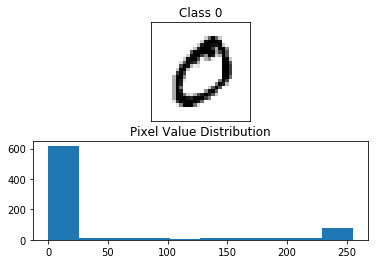

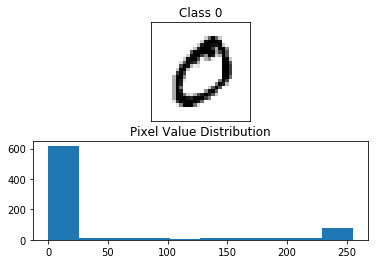

In [8]:

fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(x_train[1], cmap='binary', interpolation='none')
plt.title("Class {}".format(y_train[1]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(x_train[1].reshape(784))
plt.title("Pixel Value Distribution")
fig

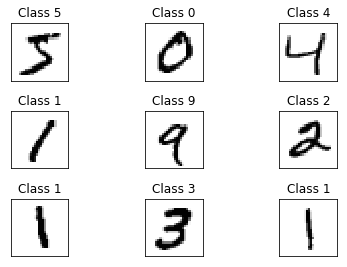

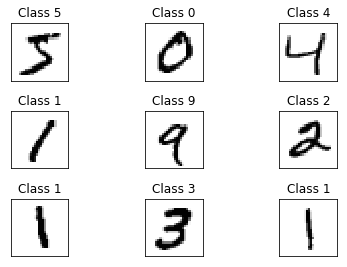

In [9]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i], cmap='binary', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [10]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [11]:
#從 28*28的pixel 轉為一維的784 element建立輸入向量
x_train = x_train.reshape(60000,784)#要將這些資料reshape成784維度的
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#正規劃資料讓灰階的直0到1之間 
x_train /= 255
x_test /= 255

##再看一次reshape的shape(維度)是多少
print("Train matrix shape", x_train.shape)
print("Test matrix shape", x_test.shape)



Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [12]:
print(np.unique(y_train, return_counts=True))
#np.unique:將陣列中的種類挑出來(去除重複的)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [13]:
#將標籤建立成0到9的陣列
#one-hot:只有一個是1其他9個為0 那它就是那個數字
n_classes = 10 #建立10個元素的向量
print("Shape before one-hot encoding: ", y_train.shape)
#將拿到的資料轉換為一維的陣列
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ",Y_train.shape )
#有60000筆10欄的資料

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [14]:
Y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
#建立類神經深度學習 設定模型的組態 兩層layer神經元
model = Sequential() #sequential模型 (循序模型) 
model.add(Dense(256, input_shape=(784,)))#add()將神經網路一層一層疊起 輸入為784 神經元為256
model.add(Activation('relu'))#啟動函數   relu : x<0時為0 >0時為線性
model.add(Dropout(0.3))#百分之30不要

#建hidden layer
model.add(Dense(256))
model.add(Activation('relu'))#x<0時為0 >0時為線性
model.add(Dropout(0.3))#避免overfitting
          
model.add(Dense(10)) #輸出的神經元數為10(因為要輸出0-9的數字)
model.add(Activation('softmax'))#將向量值歸一化，值會在0到 1之間，Output範圍中最大的那個值 就是1
#objectives:目標函數，規定了神經網路的優化方向
#optimizers:優化器，規定了神經網路的參數如何更新
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'] )
          #categorical_crossentropy為一個成本函數 optimizer:優化

In [16]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # 只顯示Error
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # 只顯示 warning 和 Error
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' # 顯示所有信息

In [17]:
#訓練模型並存到history中
#model.fit=建立及訓練模型 
history=model.fit(x_train,Y_train,# x的資料 以及 y的label
                 batch_size=128,#每次丟128
                 epochs=8,#執行8次
                 verbose=2,#
                 validation_data=(x_test,Y_test)
                 #將x_train & y_train 做完訓練x_test以及y_test的資料當作驗證
                 )
#訓練的sample有60000筆 驗證的資料有10000筆 
#loss function(訓練成本) / accury(準確率) / 損失 / 準確性 每次訓練越來越低一值往最佳化的方向走

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
 - 5s - loss: 0.3470 - acc: 0.8953 - val_loss: 0.1291 - val_acc: 0.9596
Epoch 2/8
 - 5s - loss: 0.1468 - acc: 0.9548 - val_loss: 0.0956 - val_acc: 0.9690
Epoch 3/8
 - 5s - loss: 0.1122 - acc: 0.9654 - val_loss: 0.0836 - val_acc: 0.9735
Epoch 4/8
 - 5s - loss: 0.0909 - acc: 0.9715 - val_loss: 0.0755 - val_acc: 0.9761
Epoch 5/8
 - 5s - loss: 0.0790 - acc: 0.9754 - val_loss: 0.0673 - val_acc: 0.9793
Epoch 6/8
 - 5s - loss: 0.0677 - acc: 0.9785 - val_loss: 0.0635 - val_acc: 0.9806
Epoch 7/8
 - 5s - loss: 0.0578 - acc: 0.9814 - val_loss: 0.0669 - val_acc: 0.9782
Epoch 8/8
 - 5s - loss: 0.0570 - acc: 0.9817 - val_loss: 0.0606 - val_acc: 0.9817


In [18]:
history.history.keys()
#回傳history物件的字典 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

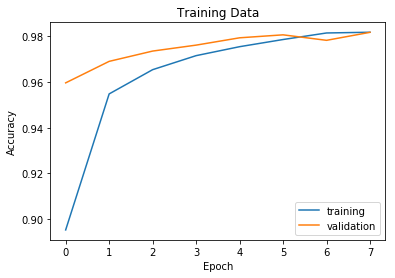

In [19]:
#顯示Training 準確性圖表
plt.xlabel('Epoch')
plt.ylabel('Accuracy') #準確性
plt.title('Training Data')
plt.plot(history.history['acc'])#訓練的準確性
plt.plot(history.history['val_acc']) #驗證的準確性
plt.legend(['training','validation'],loc='lower right')
plt.show()

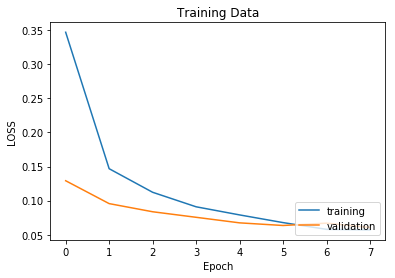

In [20]:
#顯示成本函數隨準確性降低
plt.xlabel('Epoch')
plt.ylabel('LOSS')
plt.title('Training Data')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'],loc='lower right')
plt.show()

In [21]:
loss_and_metrics= model.evaluate(x_test,Y_test,verbose=2)
print('Test Loss',loss_and_metrics[0])
print("Test Accuracy",loss_and_metrics[1])

Test Loss 0.06061773156026611
Test Accuracy 0.9817


In [25]:
predicted_classes = model.predict_classes(x_test)
#預測正確correct_indices 和預測錯誤 incorrect_indices
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices),"classified correctly")
print(len(incorrect_indices),"classified incorrectly")


9817 classified correctly
183 classified incorrectly


In [23]:
predicted_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [26]:
x_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [24]:
#rcParams定義預設數值 設定圖形長12寬7
plt.rcParams['figure.figsize']=(7,12)
figure_evalution = plt.figure()

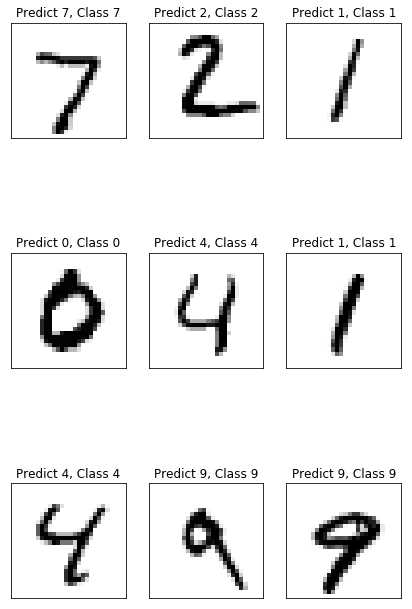

In [51]:
#放置九個預測正確的圖形
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)#3*3
    plt.imshow(x_test[correct].reshape(28,28), cmap='binary')
    plt.title("Predict {}, Class {}".format(predicted_classes[correct],y_test[correct]))
    
    plt.xticks([])
    plt.yticks([])
    
figure_evalution
    

In [54]:
incorrect_indices

array([   8,   33,   38,  124,  149,  151,  241,  247,  259,  290,  300,
        320,  321,  340,  352,  381,  445,  448,  449,  478,  495,  507,
        511,  551,  565,  578,  582,  591,  610,  613,  619,  659,  684,
        691,  707,  717,  720,  740,  810,  844,  881,  890,  924,  938,
        939,  950,  951,  956,  965, 1014, 1032, 1039, 1055, 1062, 1068,
       1107, 1112, 1114, 1128, 1173, 1181, 1182, 1192, 1204, 1226, 1232,
       1242, 1247, 1253, 1256, 1260, 1283, 1289, 1319, 1326, 1328, 1364,
       1378, 1393, 1413, 1433, 1440, 1467, 1494, 1500, 1522, 1525, 1527,
       1530, 1549, 1553, 1601, 1609, 1621, 1634, 1671, 1678, 1681, 1709,
       1717, 1721, 1732, 1751, 1754, 1772, 1773, 1790, 1850, 1878, 1901,
       1917, 1938, 1952, 1970, 1984, 2016, 2024, 2040, 2043, 2044, 2053,
       2068, 2070, 2098, 2109, 2118, 2129, 2130, 2135, 2182, 2185, 2186,
       2189, 2224, 2266, 2272, 2291, 2293, 2299, 2325, 2369, 2371, 2387,
       2393, 2406, 2414, 2422, 2433, 2454, 2462, 24

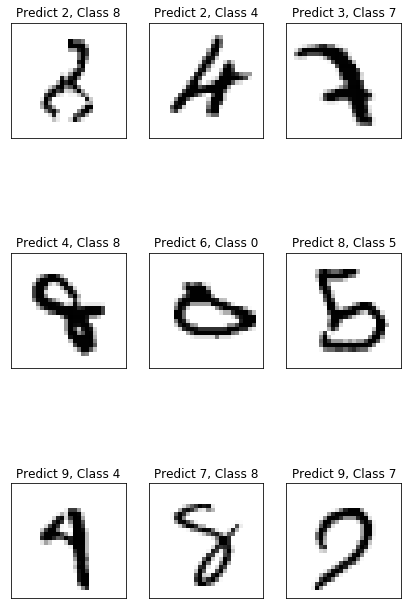

In [32]:
#放置九個預測錯誤的圖形
for i, incorrect in enumerate(incorrect_indices[9:18]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='binary')
    plt.title("Predict {}, Class {}".format(predicted_classes[incorrect],y_test[incorrect]))
    
    plt.xticks([])
    plt.yticks([])
    
figure_evalution